In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('train_clean.csv')
exc = pd.read_csv('exclamations.csv')
approvals = pd.read_csv('approval_prop.csv')
resources = pd.read_csv('cleaned_resources.csv', engine='python')

In [4]:
train.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,essay3_count_nostop,essay4_count_nostop,proj_resouce_count_nostop,desc_count_nostop,full_text,tag_text,lemm_text,month,year,dow
0,0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,super sight word centers,kindergarten students come lowincome household...,currently differentiated sight word center dai...,...,0,0,13,22,super sight word centers kindergarten students...,super sight word centers kindergarten student...,super sight word center kindergarten student c...,11,2016,4
1,1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,keep calm dance,elementary school culturally rich school diver...,strive provide diverse population students ext...,...,0,0,8,11,keep calm dance elementary school culturally r...,keep calm dance elementary school culturally ...,keep calm dance elementary school culturally r...,4,2017,2
2,2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,lets doodle learn,hellornmy name mrs brotherton teach th grade a...,looking add doodler classroom would wonderful ...,...,0,0,18,5,lets doodle learn hellornmy name mrs brotherto...,lets doodle learn hellornmy name mrs brothert...,let doodle learn hellornmy name mr brotherton ...,1,2017,6
3,3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,kid inspired equipment increase activities gai...,students greatest students socially economical...,students project totally kidinspireddecided ne...,...,0,0,19,20,kid inspired equipment increase activities gai...,kid inspired equipment increase activities ga...,kid inspire equipment increase activity gain w...,8,2016,4
4,4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,need clean water culinary arts class,students athletes students interested health p...,reason kitchen water comes faucet white lookin...,...,0,0,8,8,need clean water culinary arts class students ...,need clean water culinary arts class students...,need clean water culinary art class student at...,8,2016,5


In [5]:
train.drop('Unnamed: 0', 1, inplace=True)

In [6]:
exc.head()

,Unnamed: 0,id,total_exc,title_exc,essay1_exc,essay2_exc,essay3_exc,essay4_exc,resource_exc
0,0,p036502,1,0,1,0,0,0,0
1,1,p039565,0,0,0,0,0,0,0
2,2,p233823,0,0,0,0,0,0,0
3,3,p185307,1,0,0,1,0,0,0
4,4,p013780,1,1,0,0,0,0,0


In [7]:
exc.drop('Unnamed: 0', 1, inplace=True)

In [8]:
approvals.head()

,teacher_id,per_approved
0,00000f7264c27ba6fea0c837ed6aa0aa,1.0
1,00002d44003ed46b066607c5455a999a,1.0
2,00006084c3d92d904a22e0a70f5c119a,1.0
3,0000a9af8b6b9cc9e41f53322a8b8cf1,1.0
4,0000d4777d14b33a1406dd6c9019fe89,1.0


In [10]:
resources = resources[['id','mean_price']]

In [12]:
train = train.merge(resources, left_on='id', right_on='id', how='left')
train = train.merge(exc, left_on='id', right_on='id', how='left')
train = train.merge(approvals, left_on='teacher_id', right_on='teacher_id', how='left')

In [13]:
train.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'quantity', 'total_price', 'min_quantity', 'max_quantity', 'min_price',
       'max_price', 'description', 'Applied Learning', 'Health & Sports',
       'History & Civics', 'Literacy & Language', 'Math & Science',
       'Music & The Arts', 'Special Needs_x', 'Warmth Care & Hunger_x',
       'Applied Sciences', 'Character Education', 'Civics & Government',
       'College & Career Prep', 'Community Service', 'ESL',
       'Early Development', 'Economics', 'Environmental Science',
       'Extracurricular', 'Financial Literacy', 'Foreign Languages',
       'Gym & Fitness', 'Health & Life Science', 'Health & Wellness',
       'History & Geography', 'L

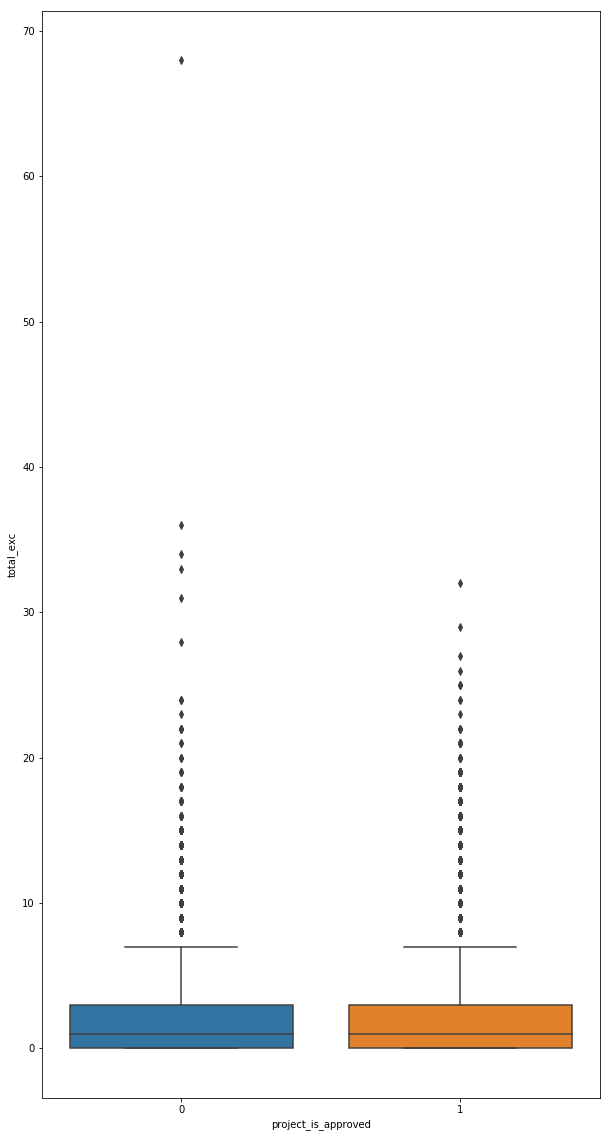

In [15]:
plt.figure(figsize=(10,20))
sns.boxplot(x='project_is_approved', y='total_exc', data=train)
plt.show()

In [16]:
train.groupby('project_is_approved')['total_exc'].mean()

project_is_approved
0    2.087713
1    2.194289
Name: total_exc, dtype: float64

In [19]:
train.groupby('project_is_approved')['total_exc'].std()

project_is_approved
0    2.537638
1    2.460198
Name: total_exc, dtype: float64

In [20]:
train.groupby('project_is_approved')['per_approved'].mean()

project_is_approved
0    0.302687
1    0.944986
Name: per_approved, dtype: float64

In [23]:
train.groupby('project_is_approved')['per_approved'].std()

project_is_approved
0    0.323590
1    0.127586
Name: per_approved, dtype: float64

In [24]:
train.groupby('project_is_approved')['per_approved'].median()

project_is_approved
0    0.0
1    1.0
Name: per_approved, dtype: float64

In [33]:
train.to_csv('train_clean2.csv')